In [ ]:
"""
    Fake testing records
    1. Boxplot all
        s_off_g
        s_on_g
        s_in
        s_out
        s_saves
        s_blocked
        c_yellow
        goals_home
        goals_away
    2. Boxplot per team
        2.1 Boxplot per team home
        2.2 Boxplot per team away
"""

In [13]:
import pandas as pd
import numpy as np

In [1]:
def clean_data(df):
    df = df.drop(df.columns[0], axis=1)
    df = df.drop(columns=["league","id"], axis=1)
    # Just fixtures statistics
    df["home_team.name"] = df["team_home.team.name"]
    df["home_team.id"] = df["team_home.team.id"]
    df["away_team.name"] = df["team_away.team.name"]
    df["away_team.id"] = df["team_away.team.id"]
    df = df.drop(df.filter(regex='team_away').columns, axis=1)
    df = df.drop(df.filter(regex='team_home.').columns, axis=1)
    df["stats_away.p_percentage"] = df["stats_away.p_accurate"]/df["stats_away.p_total"]
    df["stats_home.p_percentage"] = df["stats_home.p_accurate"]/df["stats_home.p_total"]
    # None values set to 0
    df.fillna(value=0, inplace=True)
    # Posession % to decimal
    df["stats_away.possession"] = df["stats_away.possession"].apply(lambda x: (int(str(x).strip('%'))/100))
    df["stats_home.possession"] = df["stats_home.possession"].apply(lambda x: (int(str(x).strip('%'))/100))
    return df

In [ ]:
def diff_data(data):
    new_data = pd.DataFrame()
    new_data["diff_s_on_g"] = data["stats_home.s_on_g"]-data["stats_away.s_on_g"]
    new_data["diff_s_off_g"] = data["stats_home.s_off_g"]-data["stats_away.s_off_g"]
    new_data["diff_s_total"] = data["stats_home.s_total"]-data["stats_away.s_total"]
    new_data["diff_s_in"] = data["stats_home.s_in"]-data["stats_away.s_in"]
    new_data["diff_s_out"] = data["stats_home.s_out"]-data["stats_away.s_out"]
    new_data["diff_saves"] = data["stats_home.saves"]-data["stats_away.saves"]
    #new_data["diff_p_percentage"] = data["stats_home.p_percentage"]-data["stats_away.p_percentage"]
    new_data["stats_away.c_yellow"] = data["stats_away.c_yellow"]
    new_data["stats_home.c_yellow"] = data["stats_home.c_yellow"]
    return new_data

In [24]:
def df_season(country, league, season, week, drop_goals=True):
    dirCountry = '../' + country + '/'
    dirName = dirCountry + league + '/' + str(season) + '/'
    file_title = str(season) + '_' + str(week) + '.csv'
    csv_file = dirName + file_title
    df = pd.read_csv(csv_file)
    df = clean_data(df)
    if drop_goals:
        df = df.drop(columns=["goals_away","goals_home"], axis=1) 
    return df

In [25]:
# League directory
country = 'ES'
league = '140'
curr_week = 38
season = 2019

In [26]:
# Data initialization
df = df_season(country, league, season, curr_week, drop_goals=False)

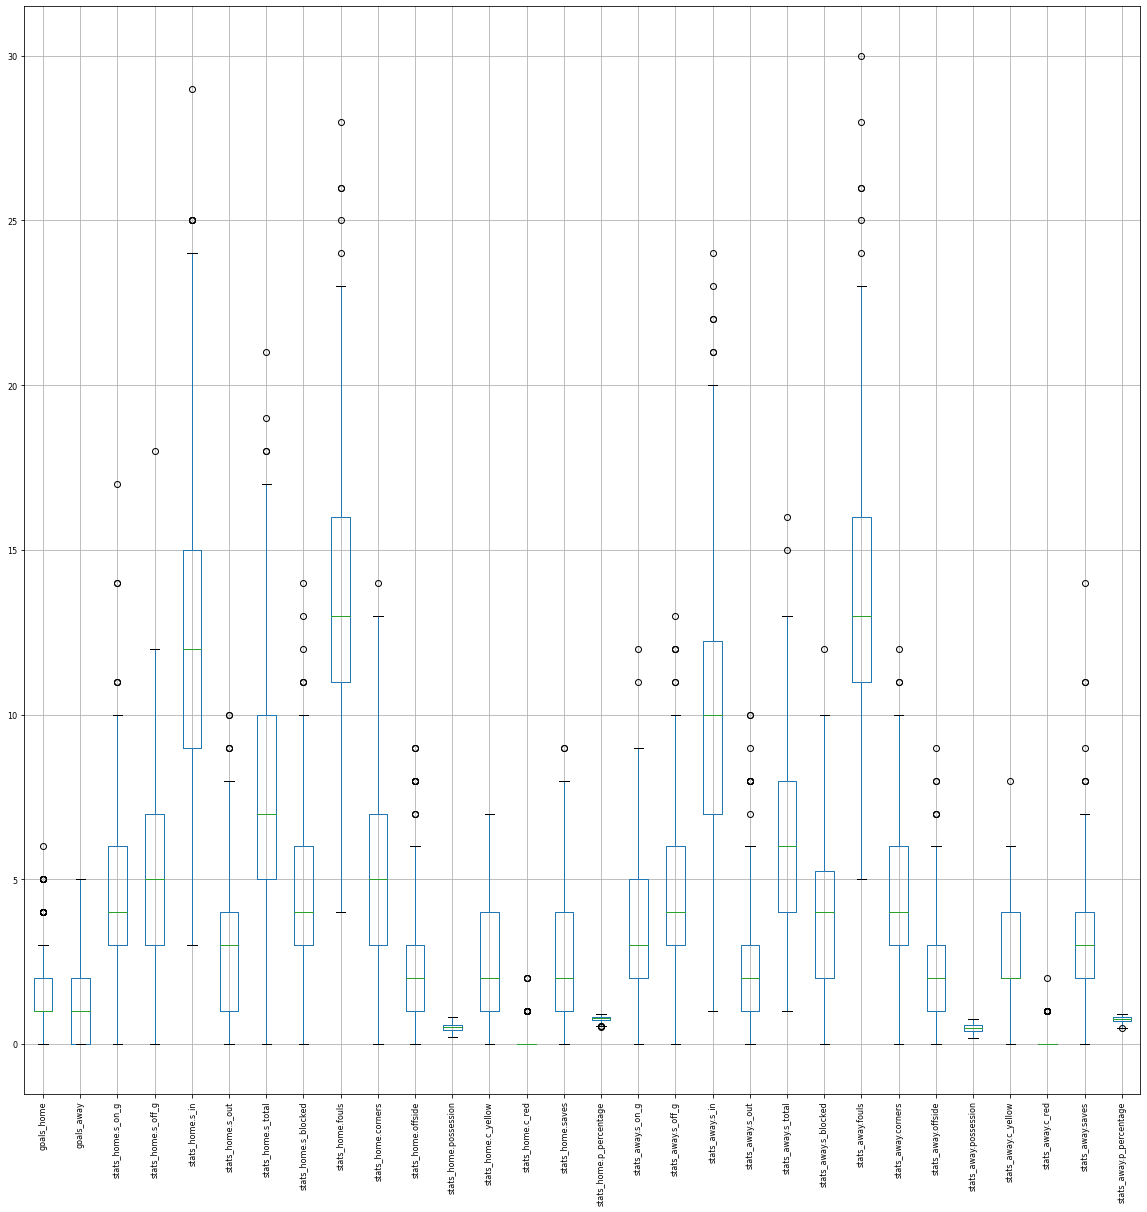

In [27]:
column = ['goals_home', 'goals_away']
column = column + df.filter(regex='stats').columns.tolist()
boxplot = df.boxplot(column=column, rot=90, fontsize=8, figsize=(20,20))

In [4]:
# Historicity: multi season directory
year_window = 1
start_season = 2019
seasons = list(range(start_season, start_season - year_window, -1))
print(seasons)

[2019]


In [ ]:
# Data initialization
data = []
for season in seasons:
    df = df_season(country, league, season, curr_week, drop_goals=False)
    tup = (season, df)
    data.append(tup)
# TODO: Change target
all_data, all_target = get_all(data)